In [1217]:
# Importing storage libraries from google cloud.

from google.cloud import storage
client = storage.Client()
# Specify the name of the bucket.

bucket = client.get_bucket("foodmart_dataset")


In [1218]:
blob = bucket.get_blob(f"fda_data_science_case.txt")

In [1219]:
bt = blob.download_as_string()

In [1220]:
# Transform bytes to string
from io import StringIO
s = str(bt,"utf-8")
s2 = StringIO(s)

We have now imported the main dataset into our jupyter notebook.

In [1221]:
import pandas as pd
df=pd.read_csv(StringIO(s), sep='\t', header=[0])

In [1222]:
df.head(10)

,FIN_CLNDR_YRMN,BRAND,BCV_SGMNT,PROVINCE,TIER,DEVICE_DESC,MODEL_TYP,CHANNEL,SUBCHANNEL,REASON_DESC,...,LD_USG_AMT,SMS_USG_AMT,VOICE_USG_AMT,HUG_AMT,CONTRA_AMT,OB_ROAMING_AMT,OTHER_AMT,SUB_CNT,NET_ADDS,HUGS
0,202003,B,Consumer,NL,MOBILEINT,?,Grey Market,?,?,?,...,0.00,8.60,0.00,0.00,-36.00,0.00,175.00,36.00,0.00,0.00
1,202101,V,Virgin,PE,HIGH,?,Grey Market,?,?,?,...,0.00,0.00,0.00,0.00,0.00,0.00,35.00,3.00,0.00,0.00
2,202102,B,Consumer,NB,MID,?,Grey Market,?,?,?,...,16.90,4.40,0.65,45.00,-40.00,0.00,95.00,71.00,0.00,0.00
3,201912,B,Consumer,BC,PREMIUM,PDA-Smartphone,BM Device,?,?,?,...,8582.77,4891.17,581.41,0.00,-794.11,22933.75,10958.28,12786.00,0.00,0.00
4,201904,B,Consumer,MB,PREMIUM,?,Grey Market,?,?,?,...,93.50,23.60,51.50,0.00,-110.70,72.00,4135.51,100.00,0.00,0.00
5,202103,B,Consumer,NB,HIGH,?,Grey Market,?,?,?,...,290.20,30.30,-37.00,783.00,0.00,0.00,3374.15,125.00,0.00,0.00
6,201902,V,Virgin,NB,MIDHIGH,Smartphone,BM Device,?,?,?,...,9.50,0.00,2.49,0.00,0.00,40.00,35.00,54.00,0.00,0.00
7,201911,V,Virgin,NL,HIGH,Phones,BM Device,?,?,?,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
8,202001,B,Consumer,AB,MOBILEINT,?,Grey Market,?,?,?,...,0.00,5.10,0.00,0.00,0.00,0.00,-305.00,335.00,0.00,0.00
9,202011,B,Consumer,NS,HIGH,?,Grey Market,?,?,?,...,373.00,22.20,21.29,23.00,0.00,24.00,1970.86,134.00,0.00,0.00


Next, we import all our economic variables datasets from the cloud.

In [1223]:
blob = bucket.get_blob(f"historical_country_canada_indicator_unemployment_rate (3).csv")
bt = blob.download_as_string()
# Transform bytes to string
from io import StringIO
s = str(bt,"utf-8")
s2 = StringIO(s)
import pandas as pd
unemployment=pd.read_csv(StringIO(s), sep=';', header=[0])

We needto match the dates in our unemployment dataset with the dates represented in our case study. So we subset the unemployment dataset for the specific dates.

In [1224]:
from datetime import *
from_date = date(2018, 12, 31)
to_date = date(2021,6,30)

In [1225]:
unemployment.shape

(669, 7)

In [1226]:
unemployment['Date'] = pd.to_datetime(unemployment['DateTime']).dt.date
unemployment = unemployment.loc[(unemployment['Date'] > from_date) & (unemployment['Date'] < to_date)]

In [1227]:
unemployment.shape
economic.shape

(29, 3)

Next, we get our second dataset containing economic indicators like Inflation rate and Immigration.

In [1228]:
blob = bucket.get_blob(f"economic.csv")
bt = blob.download_as_string()
# Transform bytes to string
from io import StringIO
s = str(bt,"utf-8")
s2 = StringIO(s)
import pandas as pd
economic=pd.read_csv(StringIO(s),  header=[0])

In [1229]:
economic['Date'] = pd.to_datetime(economic['Date'])
economic.head()

,Date,Inflation_rate,Immigration
0,2021-05-01,3.60,18645
1,2021-04-01,3.40,20250
2,2021-03-01,2.20,27060
3,2021-02-01,1.10,26900
4,2021-01-01,1.00,33015


In [1230]:
economic=economic.iloc[::-1].reset_index(drop=True)


In [1231]:
unemployment = unemployment.reset_index()


In [1232]:
economicdata = pd.concat([unemployment, economic],axis = 1)

In [1233]:
economicdata = economicdata[['Value','Inflation_rate','Immigration']]
economicdata

,Value,Inflation_rate,Immigration
0,5.80,1.40,17460
1,5.80,1.50,21170
2,5.80,1.90,22395
3,5.70,2.00,23395
4,5.40,2.40,24675
5,5.50,2.00,11000
6,5.70,2.00,15270
7,5.70,1.90,14995
8,5.50,1.90,15015
9,5.50,1.90,11375


In [1234]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

We now impute all our missing values.

In [1235]:
def impute_data(df):
    df2 = df.replace({'?': None})
    temp = pd.DataFrame(index=df2.columns)
    temp['data_type']=df2.dtypes
    temp['null_count']=df2.isnull().sum()
    temp['unique_count']=df2.nunique()
    temp['%_missing_values'] =round(df2.isnull().sum()/df.shape[0],4)*100 
    return temp, df2



In [1236]:
Missing_value_count, df2 = impute_data(df)
Missing_value_count

,data_type,null_count,unique_count,%_missing_values
FIN_CLNDR_YRMN,int64,0,29,0.00
BRAND,object,0,4,0.00
BCV_SGMNT,object,0,6,0.00
PROVINCE,object,7826,14,0.32
TIER,object,0,8,0.00
DEVICE_DESC,object,603028,17,24.63
MODEL_TYP,object,44,2,0.00
CHANNEL,object,66959,7,2.74
SUBCHANNEL,object,66959,50,2.74
REASON_DESC,object,67432,165,2.75


In [1237]:
# Select all the categorical variables and replace it with mode.
for column in ['PROVINCE', 'CHANNEL', 'SUBCHANNEL','REASON_DESC','MODEL_TYP']:
    print(column)
    mode = df2[column].mode()[0]
    print(mode)
    df2[column] = df2[column].fillna(mode)
#df2.fillna(df2.select_dtypes(include='object').mode().iloc[0], inplace=True)

PROVINCE
ON
CHANNEL
Retail
SUBCHANNEL
Traditional
REASON_DESC
NAC-NEW ACTIVATION
MODEL_TYP
BM Device


In [1238]:
# Check for missing values after imputation.
missing_value_count_after= df2.isna().sum()
missing_value_count_after

FIN_CLNDR_YRMN         0
BRAND                  0
BCV_SGMNT              0
PROVINCE               0
TIER                   0
DEVICE_DESC       603028
MODEL_TYP              0
CHANNEL                0
SUBCHANNEL             0
REASON_DESC            0
MRC_AMT                0
SPC_AMT                0
DATA_USG_AMT           0
LD_USG_AMT             0
SMS_USG_AMT            0
VOICE_USG_AMT          0
HUG_AMT                0
CONTRA_AMT             0
OB_ROAMING_AMT         0
OTHER_AMT              0
SUB_CNT                0
NET_ADDS               0
HUGS                   0
dtype: int64

We convert the date provided in the dataset to date time format.

In [1239]:
import datetime
df2['FIN_CLNDR_YRMN'] = pd.to_datetime(df2['FIN_CLNDR_YRMN'], format= '%Y%m')
df2.fillna('Smartphone', inplace=True)


   

In [1240]:
df2.head(100
    )

,FIN_CLNDR_YRMN,BRAND,BCV_SGMNT,PROVINCE,TIER,DEVICE_DESC,MODEL_TYP,CHANNEL,SUBCHANNEL,REASON_DESC,...,LD_USG_AMT,SMS_USG_AMT,VOICE_USG_AMT,HUG_AMT,CONTRA_AMT,OB_ROAMING_AMT,OTHER_AMT,SUB_CNT,NET_ADDS,HUGS
0,2020-03-01,B,Consumer,NL,MOBILEINT,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,0.00,8.60,0.00,0.00,-36.00,0.00,175.00,36.00,0.00,0.00
1,2021-01-01,V,Virgin,PE,HIGH,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,0.00,0.00,0.00,0.00,0.00,0.00,35.00,3.00,0.00,0.00
2,2021-02-01,B,Consumer,NB,MID,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,16.90,4.40,0.65,45.00,-40.00,0.00,95.00,71.00,0.00,0.00
3,2019-12-01,B,Consumer,BC,PREMIUM,PDA-Smartphone,BM Device,Retail,Traditional,NAC-NEW ACTIVATION,...,8582.77,4891.17,581.41,0.00,-794.11,22933.75,10958.28,12786.00,0.00,0.00
4,2019-04-01,B,Consumer,MB,PREMIUM,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,93.50,23.60,51.50,0.00,-110.70,72.00,4135.51,100.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-01,V,Virgin,NS,LEGACY,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,2329.95,141.20,2120.73,0.00,-200.00,10920.15,54689.18,8132.00,0.00,0.00
96,2021-02-01,V,Virgin,BC,PREMIUM,Smartphone,BM Device,Retail,Traditional,NAC-NEW ACTIVATION,...,870.07,0.00,198.70,990.00,0.00,243.00,195.00,1636.00,0.00,0.00
97,2020-03-01,B,Consumer,NT,PREMIUM,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,11.90,0.40,0.00,80.00,0.00,40.00,704.16,19.00,0.00,0.00
98,2020-04-01,V,Virgin,NB,PREMIUM,Smartphone,BM Device,Retail,Traditional,NAC-NEW ACTIVATION,...,119.20,0.00,410.48,720.00,-137.93,188.00,467.50,448.00,0.00,0.00


Let us now calculate the total revenue column.

In [1241]:
df2.columns

Index(['FIN_CLNDR_YRMN', 'BRAND', 'BCV_SGMNT', 'PROVINCE', 'TIER',
       'DEVICE_DESC', 'MODEL_TYP', 'CHANNEL', 'SUBCHANNEL', 'REASON_DESC',
       'MRC_AMT', 'SPC_AMT', 'DATA_USG_AMT', 'LD_USG_AMT', 'SMS_USG_AMT',
       'VOICE_USG_AMT', 'HUG_AMT', 'CONTRA_AMT', 'OB_ROAMING_AMT', 'OTHER_AMT',
       'SUB_CNT', 'NET_ADDS', 'HUGS'],
      dtype='object')

In [1242]:
# Next ,we check for negative values in the revenues.
df2['MRC_AMT'].describe()

count    2447886.00
mean        5851.61
std       147195.95
min       -75768.98
25%           32.00
50%           85.00
75%          250.00
max     25036998.89
Name: MRC_AMT, dtype: float64

In [1243]:
# Get names of indexes for which column HAS NEGATIVE VALUES
#indexNames = df2[ (df2['MRC_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)
#indexNames = df2[ (df2['DATA_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)
#indexNames = df2[ (df2['SMS_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)

#indexNames = df2[ (df2['LD_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)


#indexNames = df2[ (df2['VOICE_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)

In [1244]:
df2['SUB_CNT'].describe()

count   2447886.00
mean        108.82
std        2369.49
min           1.00
25%           1.00
50%           2.00
75%           5.00
max      324527.00
Name: SUB_CNT, dtype: float64

In [1245]:
df2.describe()

,MRC_AMT,SPC_AMT,DATA_USG_AMT,LD_USG_AMT,SMS_USG_AMT,VOICE_USG_AMT,HUG_AMT,CONTRA_AMT,OB_ROAMING_AMT,OTHER_AMT,SUB_CNT,NET_ADDS,HUGS
count,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00,2447886.00
mean,5851.61,141.47,338.18,52.46,16.41,30.60,22.01,-90.74,149.59,167.45,108.82,-0.54,2.49
std,147195.95,4260.06,7828.43,1443.28,477.22,1120.13,658.38,3656.88,5560.47,4648.31,2369.49,16.06,25.55
min,-75768.98,-1653.73,-263424.52,-2459.76,-14133.85,-10227.31,-48303.60,-916163.82,-141414.84,-620201.59,1.00,-5094.00,0.00
25%,32.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00
50%,85.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
75%,250.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00
max,25036998.89,1006201.99,1889232.19,285914.51,74941.58,322897.64,221238.97,11874.32,1314529.41,1100349.10,324527.00,2690.00,4087.00


In [1246]:
# Creating the Base revenue and Additional revenue columns.

cols_to_add1 = ('MRC_AMT', 'SPC_AMT')
cols_to_add2 =('DATA_USG_AMT', 'LD_USG_AMT', 'SMS_USG_AMT',
       'VOICE_USG_AMT')

df2['Base_revenue']=df2.loc[:,cols_to_add1].sum(axis=1)

df2['Addnl_revenue']=df2.loc[:,cols_to_add2].sum(axis=1)

In [1247]:
df2.head(3)

,FIN_CLNDR_YRMN,BRAND,BCV_SGMNT,PROVINCE,TIER,DEVICE_DESC,MODEL_TYP,CHANNEL,SUBCHANNEL,REASON_DESC,...,VOICE_USG_AMT,HUG_AMT,CONTRA_AMT,OB_ROAMING_AMT,OTHER_AMT,SUB_CNT,NET_ADDS,HUGS,Base_revenue,Addnl_revenue
0,2020-03-01,B,Consumer,NL,MOBILEINT,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,0.00,0.00,-36.00,0.00,175.00,36.00,0.00,0.00,232.87,108.68
1,2021-01-01,V,Virgin,PE,HIGH,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,0.00,0.00,0.00,0.00,35.00,3.00,0.00,0.00,108.00,0.00
2,2021-02-01,B,Consumer,NB,MID,Smartphone,Grey Market,Retail,Traditional,NAC-NEW ACTIVATION,...,0.65,45.00,-40.00,0.00,95.00,71.00,0.00,0.00,2869.24,22.51


In [1248]:
df2.columns


Index(['FIN_CLNDR_YRMN', 'BRAND', 'BCV_SGMNT', 'PROVINCE', 'TIER',
       'DEVICE_DESC', 'MODEL_TYP', 'CHANNEL', 'SUBCHANNEL', 'REASON_DESC',
       'MRC_AMT', 'SPC_AMT', 'DATA_USG_AMT', 'LD_USG_AMT', 'SMS_USG_AMT',
       'VOICE_USG_AMT', 'HUG_AMT', 'CONTRA_AMT', 'OB_ROAMING_AMT', 'OTHER_AMT',
       'SUB_CNT', 'NET_ADDS', 'HUGS', 'Base_revenue', 'Addnl_revenue'],
      dtype='object')

Now we extract the time series data for `Base revenues`, `additional revenues`, `subscriber counts`, `Net adds` and `HUGS`.
We aggregate each of these values on a monthly basis and construct a time series.

Creating the dataset for our time series forecasting model.

In [1249]:
timeseries = df2.groupby(['FIN_CLNDR_YRMN'])['Base_revenue','Addnl_revenue','SUB_CNT','HUGS','OB_ROAMING_AMT'].sum().reset_index()
timeseries

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,FIN_CLNDR_YRMN,Base_revenue,Addnl_revenue,SUB_CNT,HUGS,OB_ROAMING_AMT
0,2019-01-01,490888391.46,37825448.17,8888490.00,199454.00,21480284.48
1,2019-02-01,445096299.39,35342056.56,8121997.00,158969.00,20388898.04
2,2019-03-01,546188245.94,36013352.77,8966356.00,267229.00,26650407.66
3,2019-04-01,499956160.85,43480512.42,8944430.00,211624.00,25247810.10
4,2019-05-01,505861064.15,42462252.51,9026399.00,217682.00,21709708.63
5,2019-06-01,482528658.46,51638435.46,8688137.00,239761.00,18371532.84
6,2019-07-01,491438115.38,50423958.64,8821767.00,222620.00,18312097.68
7,2019-08-01,560831563.61,62486072.47,9186306.00,277917.00,23653929.94
8,2019-09-01,515015359.48,50260314.37,9189289.00,244061.00,20112952.66
9,2019-10-01,519338272.72,41030389.40,9255483.00,193049.00,19218404.77


In [1250]:
# Import all the necessary libraries.

import statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

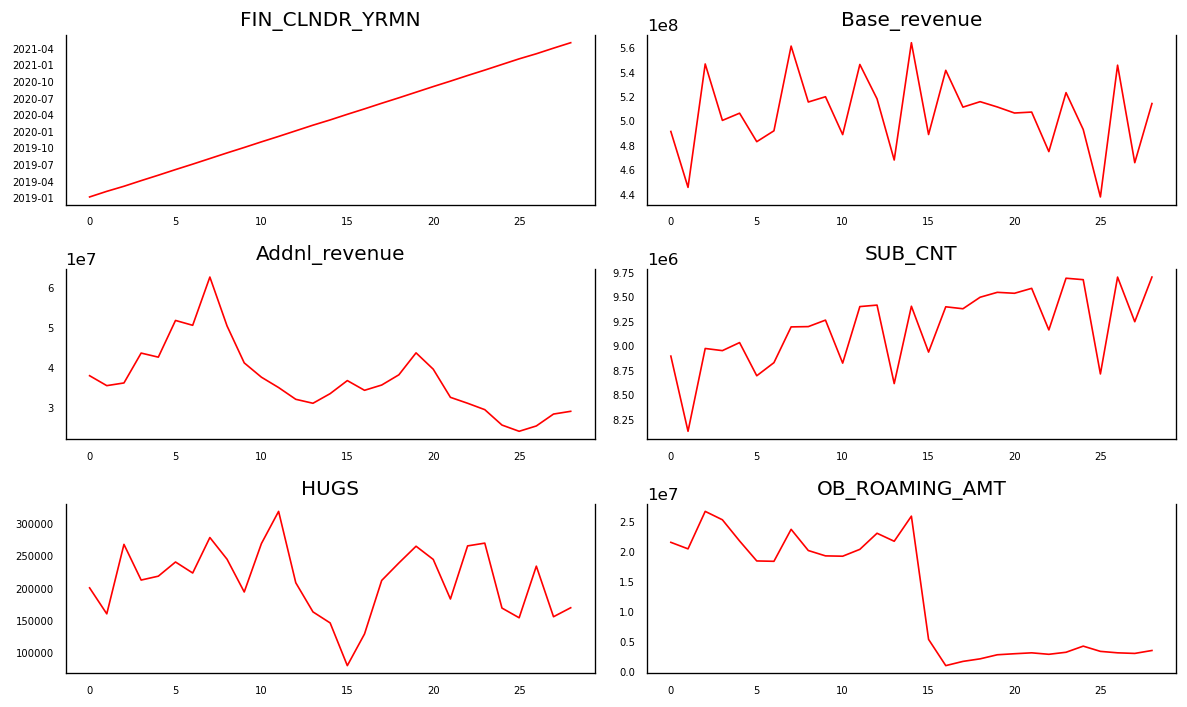

In [1252]:
# Plot all our time series variables.
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = timeseries[timeseries.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(timeseries.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [1253]:
# Tests for Granger's causality

data = timeseries[['Base_revenue','Addnl_revenue','SUB_CNT','HUGS','OB_ROAMING_AMT']]
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns) 

,Base_revenue_x,Addnl_revenue_x,SUB_CNT_x,HUGS_x,OB_ROAMING_AMT_x
Base_revenue_y,1.00,0.09,0.00,0.04,0.18
Addnl_revenue_y,0.08,1.00,0.01,0.28,0.28
SUB_CNT_y,0.08,0.39,1.00,0.00,0.00
HUGS_y,0.01,0.08,0.00,1.00,0.52
OB_ROAMING_AMT_y,0.01,0.27,0.01,0.11,1.00


Divide the dataset into training and testing.

In [1415]:
nobs = 4
df_train, df_test = data[0:-nobs], data[-nobs:]

In [1416]:
print(df_train.shape) 
print(df_test.shape)

(25, 5)
(4, 5)


In [1417]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

In [1418]:
# testing for co-integration

vec_rank = select_coint_rank(df_train, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.05)
print(vec_rank.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   5          121.0          79.34
  1   5          76.18          55.25
  2   5          42.19          35.01
  3   5          21.90          18.40
  4   5          8.703          3.841
-------------------------------------


In [1420]:
from statsmodels.tsa.vector_ar.vecm import VECM
vecm = VECM(df_train, k_ar_diff = 3, coint_rank = 5, deterministic = 'ci')

In [1421]:
vecm_fit = vecm.fit()
print(vecm_fit.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Base_revenue
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
L1.Base_revenue      -6.1820   1.21e-10   -5.1e+10      0.000      -6.182      -6.182
L1.Addnl_revenue      4.1800   1.89e-10   2.21e+10      0.000       4.180       4.180
L1.SUB_CNT          433.1197      1e-08   4.31e+10      0.000     433.120     433.120
L1.HUGS           -1742.0053   4.16e-08  -4.19e+10      0.000   -1742.005   -1742.005
L1.OB_ROAMING_AMT     8.9230   1.18e-10   7.54e+10      0.000       8.923       8.923
L2.Base_revenue      -3.1520      6e-11  -5.25e+10      0.000      -3.152      -3.152
L2.Addnl_revenue      1.8362   6.29e-11   2.92e+10      0.000       1.836       1.836
L2.SUB_CNT           75.7117   3.81e-09   1.99e+10      0.000      75.712      75.712
L2.HUGS           -1514.9458    3.9e-08  -3.88e+

In [1422]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(vecm_fit.resid)
for col, val in zip(df_train.columns, out):
    print ((col), ':', round(val, 2))

Base_revenue : 2.59
Addnl_revenue : 2.51
SUB_CNT : 2.59
HUGS : 2.67
OB_ROAMING_AMT : 2.61


In [1423]:
# Prediction

pd.options.display.float_format = "{:.2f}".format
forecast, lower, upper = vecm_fit.predict(nobs,0.05)


In [1424]:
forecast1, lower1, upper1 = vecm_fit.predict(15,0.05)

In [1425]:
forecast1

array([[ 4.26594257e+08,  3.31911852e+07,  8.57085780e+06,
         2.44554333e+05, -1.10966154e+06],
       [ 5.69199860e+08,  3.30764565e+07,  1.00816334e+07,
         2.25264096e+05,  1.11301471e+07],
       [ 4.33837546e+08,  4.12509059e+07,  8.94502404e+06,
         1.19864389e+05, -6.62986187e+06],
       [ 5.03201269e+08,  3.95904381e+07,  9.26633194e+06,
         2.36750167e+05, -3.76912735e+06],
       [ 5.11556188e+08,  4.18785387e+07,  9.72850530e+06,
         2.71699429e+05, -8.16912188e+05],
       [ 4.67291938e+08,  4.09306154e+07,  9.33925710e+06,
         2.23982483e+05, -5.17660914e+06],
       [ 4.75701659e+08,  4.56805872e+07,  9.20610536e+06,
         3.64264574e+05, -7.79736172e+04],
       [ 5.16082781e+08,  4.14233018e+07,  9.79744469e+06,
         3.37246773e+05,  9.74798043e+06],
       [ 4.55283871e+08,  3.81850668e+07,  9.21859392e+06,
         1.76342116e+05,  4.45424131e+06],
       [ 4.60142735e+08,  4.01329014e+07,  8.78266460e+06,
         3.40258593e+05

In [1426]:
point_forecasts = pd.DataFrame(forecast, columns=['Base_revenue_f','Addnl_revenue_f','SUB_CNT_f','HUGS_f','OB_ROAMING_AMT_f'])
point_forecasts1 = pd.DataFrame(forecast1, columns=['Base_revenue_f','Addnl_revenue_f','SUB_CNT_f','HUGS_f','OB_ROAMING_AMT_f'])

In [1427]:
point_forecasts1

,Base_revenue_f,Addnl_revenue_f,SUB_CNT_f,HUGS_f,OB_ROAMING_AMT_f
0,426594257.43,33191185.25,8570857.80,244554.33,-1109661.54
1,569199860.42,33076456.45,10081633.39,225264.10,11130147.13
2,433837545.68,41250905.86,8945024.04,119864.39,-6629861.87
3,503201269.04,39590438.13,9266331.94,236750.17,-3769127.35
4,511556188.44,41878538.71,9728505.30,271699.43,-816912.19
5,467291937.62,40930615.40,9339257.10,223982.48,-5176609.14
6,475701659.33,45680587.20,9206105.36,364264.57,-77973.62
7,516082780.62,41423301.75,9797444.69,337246.77,9747980.43
8,455283871.39,38185066.80,9218593.92,176342.12,4454241.31
9,460142735.43,40132901.44,8782664.60,340258.59,10660477.54


<AxesSubplot:>

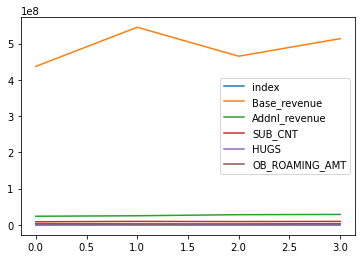

In [1428]:
df_test = df_test.reset_index()
df_test.plot()

<AxesSubplot:>

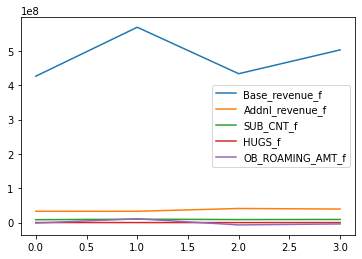

In [1429]:
point_forecasts.plot()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two 

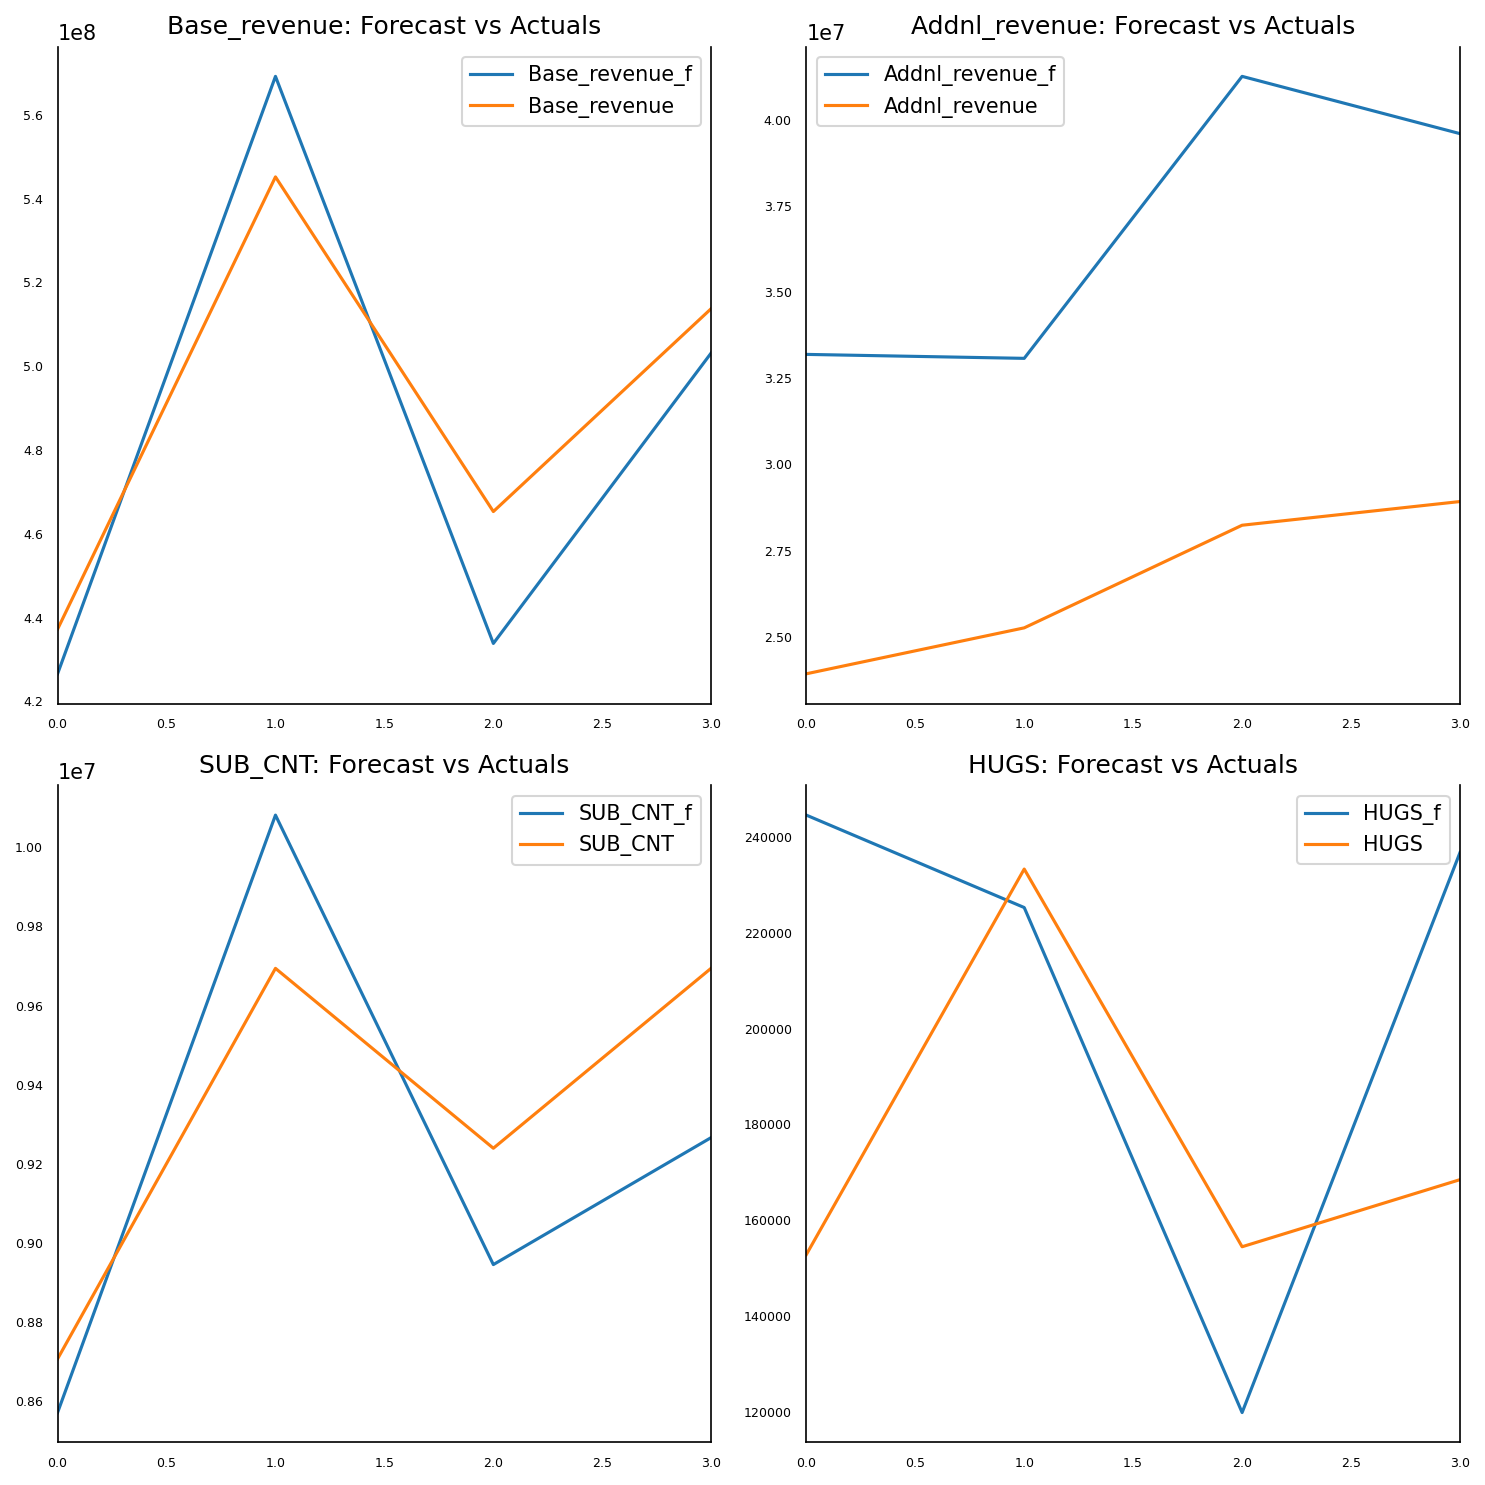

In [1437]:
# comparing forecasts with actuals

fig, axes = plt.subplots(nrows=int(len(data.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(data.columns, axes.flatten())):
    point_forecasts[col+'_f'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


# VECM foreccast evaluation

In [1431]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
   
    return({'mape':mape,'corr':corr})

print('Forecast Accuracy of: Base_revenue')
accuracy_prod = forecast_accuracy(point_forecasts['Base_revenue_f'].values, df_test['Base_revenue'])
for k, v in accuracy_prod.items():
    print (k, ': ', round(v,4))

print('\nForecast Accuracy of: Additional_revenues')
accuracy_prod = forecast_accuracy(point_forecasts['Addnl_revenue_f'].values, df_test['Addnl_revenue'])
for k, v in accuracy_prod.items():
    print (k, ': ', round(v,4))

print('\nForecast Accuracy of: SUB_CNT')
accuracy_prod = forecast_accuracy(point_forecasts['SUB_CNT_f'].values, df_test['SUB_CNT'])
for k, v in accuracy_prod.items():
    print (k, ': ', round(v,4))

print('\nForecast Accuracy of: HUGS')
accuracy_prod = forecast_accuracy(point_forecasts['HUGS_f'].values, df_test['HUGS'])
for k, v in accuracy_prod.items():
    print (k, ': ', round(v,4))



Forecast Accuracy of: Base_revenue
mape :  0.0392
corr :  0.9718

Forecast Accuracy of: Additional_revenues
mape :  0.3814
corr :  0.9328

Forecast Accuracy of: SUB_CNT
mape :  0.0329
corr :  0.8385

Forecast Accuracy of: HUGS
mape :  0.316
corr :  0.2751


# Sensitivity Analysis

In [1286]:
# First we get all our variables ready for analysis.

df2.columns

Index(['FIN_CLNDR_YRMN', 'BRAND', 'BCV_SGMNT', 'PROVINCE', 'TIER',
       'DEVICE_DESC', 'MODEL_TYP', 'CHANNEL', 'SUBCHANNEL', 'REASON_DESC',
       'MRC_AMT', 'SPC_AMT', 'DATA_USG_AMT', 'LD_USG_AMT', 'SMS_USG_AMT',
       'VOICE_USG_AMT', 'HUG_AMT', 'CONTRA_AMT', 'OB_ROAMING_AMT', 'OTHER_AMT',
       'SUB_CNT', 'NET_ADDS', 'HUGS', 'Base_revenue', 'Addnl_revenue'],
      dtype='object')

In [1287]:
from sklearn.preprocessing import StandardScaler

In [1288]:
#Get names of indexes for which column HAS NEGATIVE VALUES
#indexNames = df2[ (df2['MRC_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)
#indexNames = df2[ (df2['DATA_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)
#indexNames = df2[ (df2['SMS_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)

#indexNames = df2[ (df2['LD_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)


#indexNames = df2[ (df2['VOICE_USG_AMT'] <= 0)].index
#df2.drop(indexNames , inplace=True)

In [1289]:
df2['month'] = df2['FIN_CLNDR_YRMN'].dt.month

In [1290]:
dataset = df2

In [1291]:
dataset['month'].unique()

array([ 3,  1,  2, 12,  4, 11,  6,  5, 10,  7,  8,  9])

In [1292]:
dataset.columns

Index(['FIN_CLNDR_YRMN', 'BRAND', 'BCV_SGMNT', 'PROVINCE', 'TIER',
       'DEVICE_DESC', 'MODEL_TYP', 'CHANNEL', 'SUBCHANNEL', 'REASON_DESC',
       'MRC_AMT', 'SPC_AMT', 'DATA_USG_AMT', 'LD_USG_AMT', 'SMS_USG_AMT',
       'VOICE_USG_AMT', 'HUG_AMT', 'CONTRA_AMT', 'OB_ROAMING_AMT', 'OTHER_AMT',
       'SUB_CNT', 'NET_ADDS', 'HUGS', 'Base_revenue', 'Addnl_revenue',
       'month'],
      dtype='object')

# We first merge relevant groups in each column to reduce the number of features.

In [1293]:
conditions = [
    (dataset.BRAND == 'B'),
    (dataset.BRAND == 'V')
]

choices = ['Bell', 'Brand_virgin']

dataset['BRAND'] = np.select(conditions, choices, default = 'Other_brands')

In [1294]:
dataset['BRAND'].unique()

array(['Bell', 'Brand_virgin', 'Other_brands'], dtype=object)

In [1295]:
conditions = [
    (dataset.BCV_SGMNT == 'Consumer'),
    (dataset.BCV_SGMNT == 'Virgin'),
    (dataset.BCV_SGMNT == 'Small')
]

choices = ['Consumer', 'Virgin', 'Small']

dataset['BCV_SGMNT'] = np.select(conditions, choices, default = 'Other_bcv')

In [1296]:
conditions = [
    (dataset.PROVINCE == 'ON'),
    (dataset.PROVINCE == 'QC'),
    (dataset.PROVINCE == 'AB'),
    (dataset.PROVINCE == 'BC')
]

choices = ['ON', 'QC', 'AB','BC']

dataset['PROVINCE'] = np.select(conditions, choices, default = 'Other_province')

In [1297]:
conditions = [
    (dataset.TIER == 'HIGH'),
    (dataset.TIER == 'LEGACY'),
    (dataset.TIER == 'MID'),
    (dataset.TIER == 'PREMIUM')
]

choices = ['HIGH', 'LEGACY', 'MID','PREMIUM']

dataset['TIER'] = np.select(conditions, choices, default = 'ULTRA&LOW')


In [1298]:
dataset['DEVICE_DESC'].replace(['PDA-Smartphone'], 'Smartphone',inplace = True)

In [1299]:
conditions = [
    (dataset.DEVICE_DESC == 'iPhone'),
    (dataset.DEVICE_DESC == 'Smartphone')]

choices = ['iPhone', 'Smartphone']

dataset['DEVICE_DESC'] = np.select(conditions, choices, default = 'other_devices')

In [1300]:
dataset['DEVICE_DESC'].unique()

array(['Smartphone', 'other_devices', 'iPhone'], dtype=object)

In [1301]:
conditions = [
    (dataset.CHANNEL == 'Retail'),
    (dataset.CHANNEL == 'Direct'),
    (dataset.CHANNEL == 'Corporate'),
    (dataset.CHANNEL == 'Dealers')
]

choices = ['Retail', 'Direct', 'Corporate','Dealers']

dataset['CHANNEL'] = np.select(conditions, choices, default = 'Other_channels')

In [1302]:
dataset['CHANNEL'].unique()

array(['Retail', 'Direct', 'Corporate', 'Dealers', 'Other_channels'],
      dtype=object)

In [1303]:
dataset.columns

Index(['FIN_CLNDR_YRMN', 'BRAND', 'BCV_SGMNT', 'PROVINCE', 'TIER',
       'DEVICE_DESC', 'MODEL_TYP', 'CHANNEL', 'SUBCHANNEL', 'REASON_DESC',
       'MRC_AMT', 'SPC_AMT', 'DATA_USG_AMT', 'LD_USG_AMT', 'SMS_USG_AMT',
       'VOICE_USG_AMT', 'HUG_AMT', 'CONTRA_AMT', 'OB_ROAMING_AMT', 'OTHER_AMT',
       'SUB_CNT', 'NET_ADDS', 'HUGS', 'Base_revenue', 'Addnl_revenue',
       'month'],
      dtype='object')

In [1304]:
# One hot encoding of categorical variables.
categorical = dataset[['BRAND','BCV_SGMNT','PROVINCE','TIER','DEVICE_DESC','MODEL_TYP','CHANNEL','month']]

In [1305]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the column transformations list + columns to which to apply
col_transforms = [('transform', OneHotEncoder(), ['BRAND','BCV_SGMNT','PROVINCE','TIER','DEVICE_DESC','MODEL_TYP',
                                                  'CHANNEL','month'])]

# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans.fit(categorical)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('transform',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['BRAND', 'BCV_SGMNT', 'PROVINCE', 'TIER',
                                  'DEVICE_DESC', 'MODEL_TYP', 'CHANNEL',
                                  'month'])],
                  verbose=False)

In [1306]:
# Apply the transformations
transformed = col_trans.transform(categorical) 

# Check
transformed


<2447886x39 sparse matrix of type '<class 'numpy.float64'>'
	with 19583088 stored elements in Compressed Sparse Row format>

In [1307]:
# Put in a DataFrame
transformed_df = pd.DataFrame(data=transformed.todense(), columns=col_trans.get_feature_names())
transformed_df.head()

,transform__x0_Bell,transform__x0_Brand_virgin,transform__x0_Other_brands,transform__x1_Consumer,transform__x1_Other_bcv,transform__x1_Small,transform__x1_Virgin,transform__x2_AB,transform__x2_BC,transform__x2_ON,...,transform__x7_3,transform__x7_4,transform__x7_5,transform__x7_6,transform__x7_7,transform__x7_8,transform__x7_9,transform__x7_10,transform__x7_11,transform__x7_12
0,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [1308]:
transformed_df.columns

Index(['transform__x0_Bell', 'transform__x0_Brand_virgin',
       'transform__x0_Other_brands', 'transform__x1_Consumer',
       'transform__x1_Other_bcv', 'transform__x1_Small',
       'transform__x1_Virgin', 'transform__x2_AB', 'transform__x2_BC',
       'transform__x2_ON', 'transform__x2_Other_province', 'transform__x2_QC',
       'transform__x3_HIGH', 'transform__x3_LEGACY', 'transform__x3_MID',
       'transform__x3_PREMIUM', 'transform__x3_ULTRA&LOW',
       'transform__x4_Smartphone', 'transform__x4_iPhone',
       'transform__x4_other_devices', 'transform__x5_BM Device',
       'transform__x5_Grey Market', 'transform__x6_Corporate',
       'transform__x6_Dealers', 'transform__x6_Direct',
       'transform__x6_Other_channels', 'transform__x6_Retail',
       'transform__x7_1', 'transform__x7_2', 'transform__x7_3',
       'transform__x7_4', 'transform__x7_5', 'transform__x7_6',
       'transform__x7_7', 'transform__x7_8', 'transform__x7_9',
       'transform__x7_10', 'transform__x

In [1309]:
transformed_df.shape

(2447886, 39)

In [1310]:
continuous = dataset[['FIN_CLNDR_YRMN','Base_revenue','DATA_USG_AMT','LD_USG_AMT','SMS_USG_AMT','VOICE_USG_AMT','SUB_CNT','HUGS']]

In [1311]:
final_dataset = pd.concat([continuous, transformed_df], axis=1)

In [1312]:
final_dataset.shape

(2447886, 47)

# Predicting `Base_revenue`

In [1313]:
import xgboost as xg 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1314]:
temp = final_dataset

In [1315]:
final_dataset.columns

Index(['FIN_CLNDR_YRMN', 'Base_revenue', 'DATA_USG_AMT', 'LD_USG_AMT',
       'SMS_USG_AMT', 'VOICE_USG_AMT', 'SUB_CNT', 'HUGS', 'transform__x0_Bell',
       'transform__x0_Brand_virgin', 'transform__x0_Other_brands',
       'transform__x1_Consumer', 'transform__x1_Other_bcv',
       'transform__x1_Small', 'transform__x1_Virgin', 'transform__x2_AB',
       'transform__x2_BC', 'transform__x2_ON', 'transform__x2_Other_province',
       'transform__x2_QC', 'transform__x3_HIGH', 'transform__x3_LEGACY',
       'transform__x3_MID', 'transform__x3_PREMIUM', 'transform__x3_ULTRA&LOW',
       'transform__x4_Smartphone', 'transform__x4_iPhone',
       'transform__x4_other_devices', 'transform__x5_BM Device',
       'transform__x5_Grey Market', 'transform__x6_Corporate',
       'transform__x6_Dealers', 'transform__x6_Direct',
       'transform__x6_Other_channels', 'transform__x6_Retail',
       'transform__x7_1', 'transform__x7_2', 'transform__x7_3',
       'transform__x7_4', 'transform__x7_5', '

In [1316]:
X1 = final_dataset[['SUB_CNT','HUGS','transform__x0_Bell', 'transform__x0_Brand_virgin',
       'transform__x0_Other_brands', 'transform__x1_Consumer',
       'transform__x1_Other_bcv', 'transform__x1_Small',
       'transform__x1_Virgin', 'transform__x2_AB', 'transform__x2_BC',
       'transform__x2_ON', 'transform__x2_Other_province', 'transform__x2_QC',
       'transform__x3_HIGH', 'transform__x3_LEGACY', 'transform__x3_MID',
       'transform__x3_PREMIUM', 'transform__x3_ULTRA&LOW',
       'transform__x4_Smartphone', 'transform__x4_iPhone',
       'transform__x4_other_devices', 'transform__x5_BM Device',
       'transform__x5_Grey Market', 'transform__x6_Corporate',
       'transform__x6_Dealers', 'transform__x6_Direct',
       'transform__x6_Other_channels', 'transform__x6_Retail',
       'transform__x7_1', 'transform__x7_2', 'transform__x7_3',
       'transform__x7_4', 'transform__x7_5', 'transform__x7_6',
       'transform__x7_7', 'transform__x7_8', 'transform__x7_9',
       'transform__x7_10', 'transform__x7_11', 'transform__x7_12']]

(5966, 47)

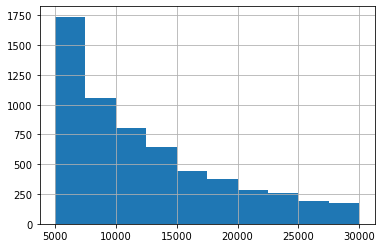

In [1317]:
temp1 = temp.loc[(temp['SUB_CNT'] >=5000) & (temp['SUB_CNT'] < 30000)]
temp1['SUB_CNT'].hist()
temp1.shape

<AxesSubplot:>

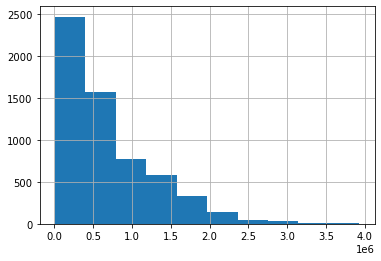

In [1318]:
y = temp1['Base_revenue']
y_sample = temp1[['Base_revenue']].reset_index()
y.describe()
y.hist()

In [1319]:
X = temp1[['FIN_CLNDR_YRMN','SUB_CNT','HUGS','transform__x0_Bell', 'transform__x0_Brand_virgin',
       'transform__x0_Other_brands', 'transform__x1_Consumer',
       'transform__x1_Other_bcv', 'transform__x1_Small',
       'transform__x1_Virgin', 'transform__x2_AB', 'transform__x2_BC',
       'transform__x2_ON', 'transform__x2_Other_province', 'transform__x2_QC',
       'transform__x3_HIGH', 'transform__x3_LEGACY', 'transform__x3_MID',
       'transform__x3_PREMIUM', 'transform__x3_ULTRA&LOW',
       'transform__x4_Smartphone', 'transform__x4_iPhone',
       'transform__x4_other_devices', 'transform__x5_BM Device',
       'transform__x5_Grey Market', 'transform__x6_Corporate',
       'transform__x6_Dealers', 'transform__x6_Direct',
       'transform__x6_Other_channels', 'transform__x6_Retail',
       'transform__x7_1', 'transform__x7_2', 'transform__x7_3',
       'transform__x7_4', 'transform__x7_5', 'transform__x7_6',
       'transform__x7_7', 'transform__x7_8', 'transform__x7_9',
       'transform__x7_10', 'transform__x7_11', 'transform__x7_12']]

In [1320]:
# calculating subscriber count across each category

X['Ontario']= X['SUB_CNT']* X['transform__x2_ON']
X['Quebec'] =  X['SUB_CNT']* X['transform__x2_QC']
X['Alberta'] =  X['SUB_CNT']* X['transform__x2_AB']
X['British_columbia']= X['SUB_CNT']* X['transform__x2_BC']
X['Ontario'].unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

array([    0.,  9121.,  9725., ..., 27996.,  6645., 22339.])

In [1321]:
X['BELL'] =  X['SUB_CNT']* X['transform__x0_Bell']
X['VIRGIN_B'] = X['SUB_CNT']* X['transform__x0_Brand_virgin']

In [1322]:
X['CONSUMER'] = X['SUB_CNT']* X['transform__x1_Consumer']
X['VIRGIN'] = X['SUB_CNT']* X['transform__x1_Virgin']
X['SMALL'] = X['SUB_CNT']* X['transform__x1_Small']


In [1323]:
X['RETAIL'] = X['SUB_CNT']* X['transform__x6_Retail']
X['CORPORATE'] = X['SUB_CNT']* X['transform__x6_Corporate']
X['DEALERS'] = X['SUB_CNT']* X['transform__x6_Dealers']
X['RETAIL'] = X['SUB_CNT']* X['transform__x6_Direct']


In [1324]:
X['BMDEVICE'] = X['SUB_CNT']* X['transform__x5_BM Device']
X['GREY'] = X['SUB_CNT']* X['transform__x5_Grey Market']

In [1325]:
X['IPHONE'] = X['SUB_CNT']* X['transform__x4_iPhone']
X['SMARTPHONE'] = X['SUB_CNT']* X['transform__x4_Smartphone']

In [1326]:
X['HIGH_TIER'] = X['SUB_CNT']* X['transform__x3_HIGH']
X['LEGACY'] = X['SUB_CNT']* X['transform__x3_LEGACY']
X['MID_TIER'] = X['SUB_CNT']* X['transform__x3_MID']
X['PREMIUM_TIER'] = X['SUB_CNT']* X['transform__x3_PREMIUM']
X['ULTRA_LOW'] = X['SUB_CNT']* X['transform__x3_ULTRA&LOW']

In [1327]:
X['JAN'] = X['SUB_CNT']* X['transform__x7_1']
X['FEB'] = X['SUB_CNT']* X['transform__x7_2']
X['MARCH'] = X['SUB_CNT']* X['transform__x7_3']
X['APR'] = X['SUB_CNT']* X['transform__x7_4']
X['MAY'] = X['SUB_CNT']* X['transform__x7_5']
X['JUNE'] = X['SUB_CNT']* X['transform__x7_6']
X['JULY'] = X['SUB_CNT']* X['transform__x7_7']
X['AUG'] = X['SUB_CNT']* X['transform__x7_8']
X['SEPT'] = X['SUB_CNT']* X['transform__x7_9']
X['OCT'] = X['SUB_CNT']* X['transform__x7_10']
X['NOV'] = X['SUB_CNT']* X['transform__x7_11']
X['DEC'] = X['SUB_CNT']* X['transform__x7_12']


In [1328]:
X.columns

Index(['FIN_CLNDR_YRMN', 'SUB_CNT', 'HUGS', 'transform__x0_Bell',
       'transform__x0_Brand_virgin', 'transform__x0_Other_brands',
       'transform__x1_Consumer', 'transform__x1_Other_bcv',
       'transform__x1_Small', 'transform__x1_Virgin', 'transform__x2_AB',
       'transform__x2_BC', 'transform__x2_ON', 'transform__x2_Other_province',
       'transform__x2_QC', 'transform__x3_HIGH', 'transform__x3_LEGACY',
       'transform__x3_MID', 'transform__x3_PREMIUM', 'transform__x3_ULTRA&LOW',
       'transform__x4_Smartphone', 'transform__x4_iPhone',
       'transform__x4_other_devices', 'transform__x5_BM Device',
       'transform__x5_Grey Market', 'transform__x6_Corporate',
       'transform__x6_Dealers', 'transform__x6_Direct',
       'transform__x6_Other_channels', 'transform__x6_Retail',
       'transform__x7_1', 'transform__x7_2', 'transform__x7_3',
       'transform__x7_4', 'transform__x7_5', 'transform__x7_6',
       'transform__x7_7', 'transform__x7_8', 'transform__x7_9',
   

In [1329]:
X_clean = X[['Ontario','FIN_CLNDR_YRMN',
       'Quebec', 'Alberta', 'British_columbia', 'BELL', 'VIRGIN_B', 'RETAIL',
       'CORPORATE', 'DEALERS', 'CONSUMER', 'VIRGIN', 'SMALL', 'BMDEVICE',
       'GREY', 'IPHONE', 'SMARTPHONE', 'HIGH_TIER', 'LEGACY', 'MID_TIER',
       'PREMIUM_TIER', 'ULTRA_LOW','JAN', 'FEB', 'MARCH', 'APR', 'MAY',
       'JUNE', 'JULY', 'AUG', 'SEPT', 'OCT', 'NOV', 'DEC']]


In [1330]:
y.shape

(5966,)

In [1331]:
y_df=pd.DataFrame(y)

In [1332]:
scenario=X_clean.join(y_df)

X_clean = X_clean.drop(['FIN_CLNDR_YRMN'], axis=1)

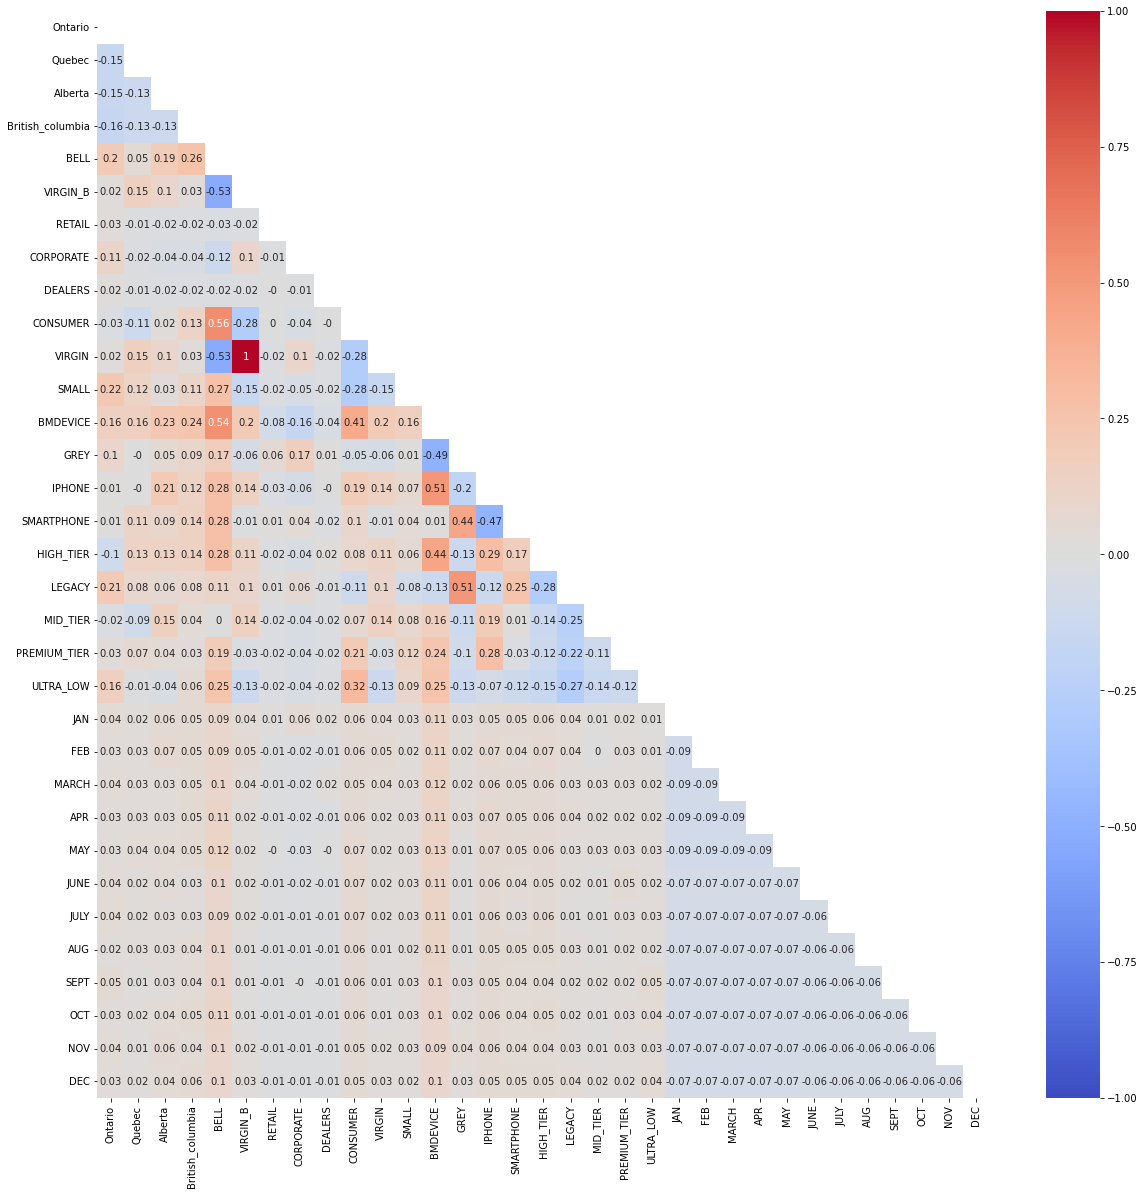

In [1333]:
# Calculate all the correlations between each independent variable
corr_df = X_clean.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [1334]:

X_reg = X_clean.drop(['VIRGIN_B','BMDEVICE','GREY','BELL','HIGH_TIER','JAN','FEB','MARCH','APR','MAY','JUNE','JULY','AUG','SEPT',
                    'OCT','NOV','DEC'], axis=1)

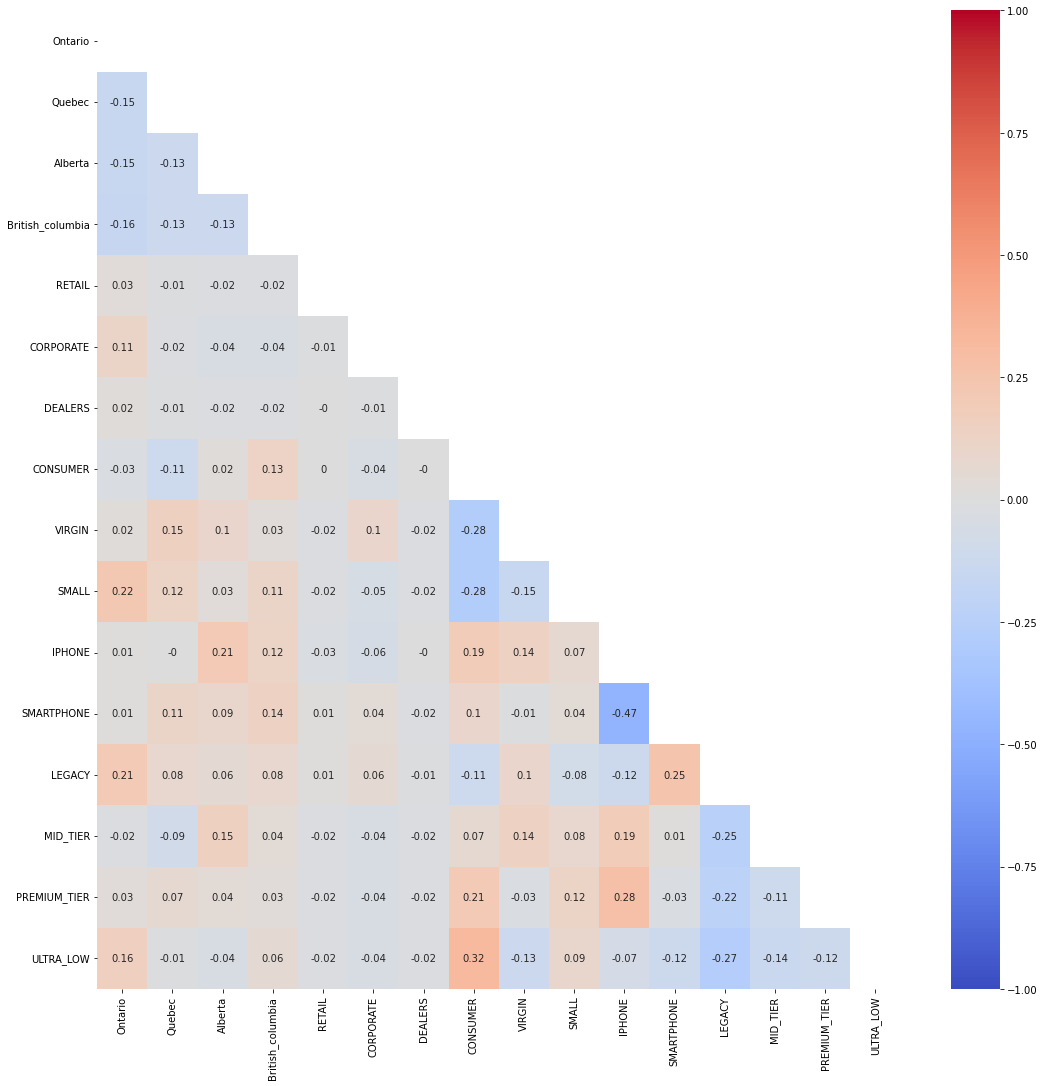

<Figure size 432x288 with 0 Axes>

In [1435]:
# Calculate all the correlations between each independent variable
corr_df = X_reg.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()
plt.savefig('correlation.png')

In [1336]:


from scipy import stats
import statsmodels.api as sm
X_reg_const = sm.add_constant(X_reg)
my_model = sm.OLS(y,X_reg_const,cov_type='HC1')

# fit

my_model = my_model.fit()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Base_revenue   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     3527.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:02:46   Log-Likelihood:                -80712.
No. Observations:                5966   AIC:                         1.615e+05
Df Residuals:                    5949   BIC:                         1.616e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.004e+05   4911.807     20.441      0.000    9.08e+04     1.1e+05
Ontario             22.2805      0.519     42.919      0.000      21.263      23.298
Quebec               9.6918      0.557     17.398      0.000       8.600      10.784
Alberta             13.8444      0.510     27.162      0.000      12.845      14.844
British_columbia     9.2723      0.486     19.097      0.000       8.320      10.224
RETAIL             -28.6091      7.142     -4.006      0.000     -42.610     -14.608
CORPORATE          -16.5025      2.163     -7.630      0.000     -20.743     -12.262
DEALERS            -28.0508      6.161     -4.553      0.000     -40.128     -15.974
CONSUMER            40.6978      0.459     88.685      0.000      39.798      41.597
VIRGIN              28.2500      0.546     51.725      0.000      27.179      29.321
SMALL               22.1886      0.577     38.466      0.000      21.058      23.319
IPHONE              41.3937      0.467     88.598      0.000      40.478      42.310
SMARTPHONE          28.6080      0.456     62.764      0.000      27.714      29.502
LEGACY             -31.1533      0.472    -66.036      0.000     -32.078     -30.228
MID_TIER           -14.4735      0.627    -23.067      0.000     -15.704     -13.243
PREMIUM_TIER         9.2050      0.629     14.632      0.000       7.972      10.438
ULTRA_LOW          -23.6851      0.640    -37.003      0.000     -24.940     -22.430
==============================================================================
Omnibus:                     1236.477   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8416.400
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       8.584   Cond. No.                     2.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1337]:
y_pred=my_model.predict(X_reg_const)

from statsmodels.tools.eval_measures import rmse

rmse(y,y_pred)

181621.1603591043

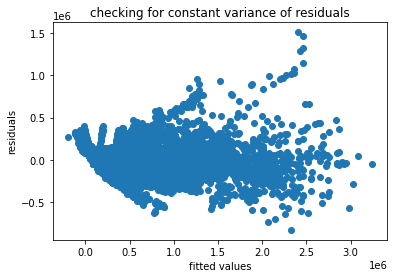

In [1338]:
# checking the residual plots

plt.figure()
plt.scatter(my_model.fittedvalues,my_model.resid)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('checking for constant variance of residuals')
plt.show()

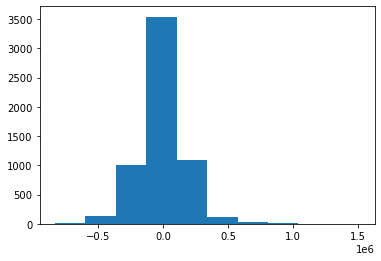

In [1339]:
plt.figure()
plt.hist(my_model.resid)
plt.show()

In [1340]:
X_train, X_test, y_train, y_test = train_test_split(X_clean,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [1341]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [1342]:
fs = SelectKBest(score_func=f_regression, k=20)

In [1343]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [1344]:
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(4176, 20)


In [1345]:
cols = fs.get_support(indices=True)
X_train1 = X_train.iloc[:,cols]
X_test1 = X_test.iloc[:,cols]

In [1346]:
len(X_train1.columns)

20

In [1347]:
#!pip install explainx

In [1348]:
#from explainx import *

In [1349]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1350]:
from sklearn.metrics import mean_squared_error as MSE
y_pred=model.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  132837.955046


In [1351]:
print (model.feature_importances_) 


print #Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is #able to decipher. 
print ("R-squared for Train: %.2f" %model.score(X_train, y_train)) 
print ("R-squared for Test: %.2f" %model.score(X_test, y_test))

[2.27913197e-02 8.59111808e-04 7.46729614e-03 6.23347676e-03
 5.16808584e-03 8.41836383e-03 0.00000000e+00 0.00000000e+00
 6.93081107e-05 1.51702030e-01 7.41547704e-03 1.90300809e-02
 2.14399663e-01 1.49456628e-04 2.47354315e-01 8.19332448e-02
 3.15909463e-02 8.12881417e-02 2.14075958e-03 6.85390460e-02
 4.12264478e-02 0.00000000e+00 1.79186231e-04 1.40338767e-03
 5.80518053e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.80651718e-04 1.34968096e-04 6.69279883e-05 3.53133967e-05
 6.49425327e-05]
R-squared for Train: 0.96
R-squared for Test: 0.95


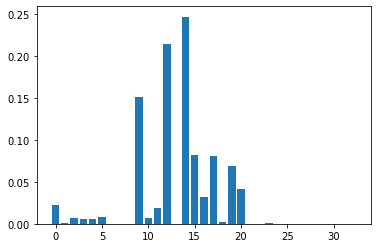

In [1352]:
# plot the feature importances.

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

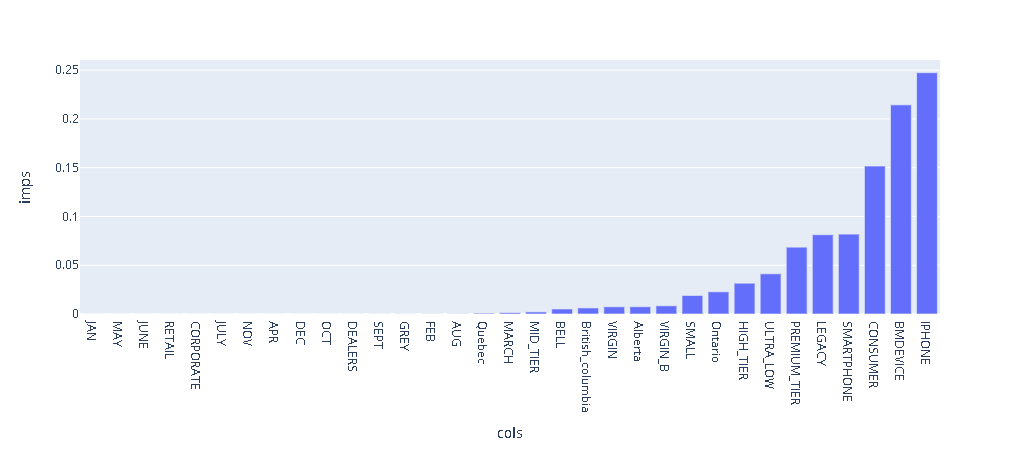

In [1358]:
# Getting the feature importance.

col_sorted_by_importance=model.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X_clean.columns[col_sorted_by_importance],
    'imps':model.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
px.bar(feat_imp, x='cols', y='imps')

In [1359]:
# Fitting a linear model using the above features.
clean = X_clean[['IPHONE','BMDEVICE','CONSUMER','SMARTPHONE','LEGACY','PREMIUM_TIER','ULTRA_LOW','HIGH_TIER','Ontario','SMALL','VIRGIN_B','Alberta','British_columbia']]
X_reg_const = sm.add_constant(clean)
my_model = sm.OLS(y,X_reg_const,cov_type='HC1')

# fit

my_model = my_model.fit()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Base_revenue   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     3925.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:03:18   Log-Likelihood:                -80984.
No. Observations:                5966   AIC:                         1.620e+05
Df Residuals:                    5952   BIC:                         1.621e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.474e+04   5374.531     10.185      0.000    4.42e+04    6.53e+04
IPHONE              38.0102      0.546     69.601      0.000      36.940      39.081
BMDEVICE             2.8166      0.578      4.871      0.000       1.683       3.950
CONSUMER            35.7586      0.500     71.503      0.000      34.778      36.739
SMARTPHONE          26.4140      0.514     51.425      0.000      25.407      27.421
LEGACY             -20.3384      0.513    -39.664      0.000     -21.344     -19.333
PREMIUM_TIER        20.8024      0.699     29.763      0.000      19.432      22.173
ULTRA_LOW          -13.6259      0.670    -20.342      0.000     -14.939     -12.313
HIGH_TIER            7.8076      0.583     13.381      0.000       6.664       8.951
Ontario             15.3721      0.503     30.572      0.000      14.386      16.358
SMALL               20.8866      0.599     34.851      0.000      19.712      22.061
VIRGIN_B            25.4395      0.586     43.407      0.000      24.291      26.588
Alberta              8.2040      0.504     16.269      0.000       7.216       9.193
British_columbia     4.2228      0.481      8.782      0.000       3.280       5.165
==============================================================================
Omnibus:                     1454.958   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11216.940
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                       9.440   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1361]:
import joblib

In [1362]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [1363]:
bucket.blob('Xtrain1.csv').upload_from_string(X_train1.to_csv(), 'text/csv')

In [1364]:
bucket.blob('Xtest1.csv').upload_from_string(X_test1.to_csv(), 'text/csv')

In [1365]:
bucket.blob('y_train.csv').upload_from_string(y_train.to_csv(), 'text/csv')

In [1366]:
bucket.blob('y_test.csv').upload_from_string(y_test.to_csv(), 'text/csv')

In [1367]:
bucket.blob('scenario.csv').upload_from_string(scenario.to_csv(), 'text/csv')

In [1368]:
bucket.blob('timeseries.csv').upload_from_string(timeseries.to_csv(), 'text/csv')

In [1369]:
bucket.blob('forecasts.csv').upload_from_string(point_forecasts.to_csv(), 'text/csv')

In [1441]:
sensitivity = pd.concat([timeseries, economicdata],axis =1)

# Sensitivity analysis using macroeconomic indicators.

In [1449]:
sensitivity.columns

Index(['FIN_CLNDR_YRMN', 'Base_revenue', 'Addnl_revenue', 'SUB_CNT', 'HUGS',
       'OB_ROAMING_AMT', 'Value', 'Inflation_rate', 'Immigration', 'logbase'],
      dtype='object')

In [1454]:
sensitivity['logbase'] = np.log(sensitivity['Base_revenue'])
sensitivity['logadd'] = np.log(sensitivity['Addnl_revenue'])
sensitivity['logsubcnt'] = np.log(sensitivity['SUB_CNT'])
sensitivity['loghugs'] = np.log(sensitivity['HUGS'])
sensitivity['logunemploy'] = np.log(sensitivity['Value'])
sensitivity['loginflation'] = np.log(sensitivity['Inflation_rate'])
sensitivity['logimmigration'] = np.log(sensitivity['Immigration'])


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



In [1455]:
sensitivity

,FIN_CLNDR_YRMN,Base_revenue,Addnl_revenue,SUB_CNT,HUGS,OB_ROAMING_AMT,Value,Inflation_rate,Immigration,logbase,logadd,logsubcnt,loghugs,logunemploy,loginflation,logimmigration
0,2019-01-01,490888391.46,37825448.17,8888490.00,199454.00,21480284.48,5.80,1.40,17460,20.01,17.45,16.00,12.20,1.76,0.34,9.77
1,2019-02-01,445096299.39,35342056.56,8121997.00,158969.00,20388898.04,5.80,1.50,21170,19.91,17.38,15.91,11.98,1.76,0.41,9.96
2,2019-03-01,546188245.94,36013352.77,8966356.00,267229.00,26650407.66,5.80,1.90,22395,20.12,17.40,16.01,12.50,1.76,0.64,10.02
3,2019-04-01,499956160.85,43480512.42,8944430.00,211624.00,25247810.10,5.70,2.00,23395,20.03,17.59,16.01,12.26,1.74,0.69,10.06
4,2019-05-01,505861064.15,42462252.51,9026399.00,217682.00,21709708.63,5.40,2.40,24675,20.04,17.56,16.02,12.29,1.69,0.88,10.11
5,2019-06-01,482528658.46,51638435.46,8688137.00,239761.00,18371532.84,5.50,2.00,11000,19.99,17.76,15.98,12.39,1.70,0.69,9.31
6,2019-07-01,491438115.38,50423958.64,8821767.00,222620.00,18312097.68,5.70,2.00,15270,20.01,17.74,15.99,12.31,1.74,0.69,9.63
7,2019-08-01,560831563.61,62486072.47,9186306.00,277917.00,23653929.94,5.70,1.90,14995,20.14,17.95,16.03,12.54,1.74,0.64,9.62
8,2019-09-01,515015359.48,50260314.37,9189289.00,244061.00,20112952.66,5.50,1.90,15015,20.06,17.73,16.03,12.41,1.70,0.64,9.62
9,2019-10-01,519338272.72,41030389.40,9255483.00,193049.00,19218404.77,5.50,1.90,11375,20.07,17.53,16.04,12.17,1.70,0.64,9.34


In [1456]:
sensitivity = sensitivity.fillna(0)
sensitivity

,FIN_CLNDR_YRMN,Base_revenue,Addnl_revenue,SUB_CNT,HUGS,OB_ROAMING_AMT,Value,Inflation_rate,Immigration,logbase,logadd,logsubcnt,loghugs,logunemploy,loginflation,logimmigration
0,2019-01-01,490888391.46,37825448.17,8888490.00,199454.00,21480284.48,5.80,1.40,17460,20.01,17.45,16.00,12.20,1.76,0.34,9.77
1,2019-02-01,445096299.39,35342056.56,8121997.00,158969.00,20388898.04,5.80,1.50,21170,19.91,17.38,15.91,11.98,1.76,0.41,9.96
2,2019-03-01,546188245.94,36013352.77,8966356.00,267229.00,26650407.66,5.80,1.90,22395,20.12,17.40,16.01,12.50,1.76,0.64,10.02
3,2019-04-01,499956160.85,43480512.42,8944430.00,211624.00,25247810.10,5.70,2.00,23395,20.03,17.59,16.01,12.26,1.74,0.69,10.06
4,2019-05-01,505861064.15,42462252.51,9026399.00,217682.00,21709708.63,5.40,2.40,24675,20.04,17.56,16.02,12.29,1.69,0.88,10.11
5,2019-06-01,482528658.46,51638435.46,8688137.00,239761.00,18371532.84,5.50,2.00,11000,19.99,17.76,15.98,12.39,1.70,0.69,9.31
6,2019-07-01,491438115.38,50423958.64,8821767.00,222620.00,18312097.68,5.70,2.00,15270,20.01,17.74,15.99,12.31,1.74,0.69,9.63
7,2019-08-01,560831563.61,62486072.47,9186306.00,277917.00,23653929.94,5.70,1.90,14995,20.14,17.95,16.03,12.54,1.74,0.64,9.62
8,2019-09-01,515015359.48,50260314.37,9189289.00,244061.00,20112952.66,5.50,1.90,15015,20.06,17.73,16.03,12.41,1.70,0.64,9.62
9,2019-10-01,519338272.72,41030389.40,9255483.00,193049.00,19218404.77,5.50,1.90,11375,20.07,17.53,16.04,12.17,1.70,0.64,9.34


In [1457]:
sensitivity.columns

Index(['FIN_CLNDR_YRMN', 'Base_revenue', 'Addnl_revenue', 'SUB_CNT', 'HUGS',
       'OB_ROAMING_AMT', 'Value', 'Inflation_rate', 'Immigration', 'logbase',
       'logadd', 'logsubcnt', 'loghugs', 'logunemploy', 'loginflation',
       'logimmigration'],
      dtype='object')

In [1459]:
y1 = sensitivity['logbase']
y2 = sensitivity['logadd']
y3=sensitivity['logsubcnt']
y4=sensitivity['loghugs']

In [1482]:
# Fitting a linear model using the above features.
sentivitymodel = sensitivity[['logunemploy']]
X_reg_const = sm.add_constant(sentivitymodel)
my_model = sm.OLS(y4,X_reg_const,cov_type='HC1')

# fit

my_model = my_model.fit()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                loghugs   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     6.181
Date:                Wed, 13 Oct 2021   Prob (F-statistic):             0.0194
Time:                        06:24:15   Log-Likelihood:                -2.1581
No. Observations:                  29   AIC:                             8.316
Df Residuals:                      27   BIC:                             11.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0728      0.348     37.591      0.000      12.359      13.786
logunemploy    -0.4283      0.172     -2.486      0.019      -0.782      -0.075
==============================================================================
Omnibus:                        1.308   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                0.875
Skew:                          -0.423   Prob(JB):                        0.646
Kurtosis:                       2.915   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""